<a href="https://colab.research.google.com/github/Daarwinmendez/LLM-Applications/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install tensorflow
!pip install evaluate
!pip install rouge_score
!pip install transformers
!pip install tf-keras
!pip install datasets
!pip install sacremoses==0.0.53
!pip install tiktoken
!pip install sentencepiece
!pip install einops
!pip install openpyxl
!pip install accelerate
!pip install seaborn

86347.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86355.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86363.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86370.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86378.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86385.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86392.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86400.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86407.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86414.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86421.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86428.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86435.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


86442.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import numpy as np
from datasets import load_dataset, list_metrics, load_metric
from sklearn.metrics import accuracy_score, confusion_matrix
from transformers import pipeline, set_seed, logging, AutoTokenizer
import tensorflow as tf
import keras as keras
import sentencepiece
import openpyxl
import os
from evaluate import load
import time
import torch
import warnings

## Estructura del Benchmark

In [ ]:
# Crear MultiIndex para las columnas
columns = pd.MultiIndex.from_product(
    [["Summarization", "Text Classification", "Translation", "Text Generation", "Zero Shot Classification", "Few Shot Learning"],
     ["Name", "Inference Time", "Size (GB)", "Qty of Parameters", "Metric"]],
    names=["Task", "Info"]
)

# Crear MultiIndex para las filas (Modelos con subíndices de tamaño)
index = pd.MultiIndex.from_product(
    [["Model1", "Model2"], ["Size1", "Size2"]],
    names=["Model", "Size"]
)

# Crear el DataFrame vacío con el índice y las columnas definidas
benchmark = pd.DataFrame(columns=columns, index=index)
benchmark # Estructura del Benchmark

Task         Summarization                                                    \
Info                  Name Inference Time Size (GB) Qty of Parameters Metric   
Model  Size                                                                    
Model1 Size1           NaN            NaN       NaN               NaN    NaN   
       Size2           NaN            NaN       NaN               NaN    NaN   
Model2 Size1           NaN            NaN       NaN               NaN    NaN   
       Size2           NaN            NaN       NaN               NaN    NaN   

Task          ... Few Shot Learning                           \
Info          ...              Name Inference Time Size (GB)   
Model  Size   ...                                              
Model1 Size1  ...               NaN            NaN       NaN   
       Size2  ...               NaN            NaN       NaN   
Model2 Size1  ...               NaN            NaN       NaN   
       Size2  ...               NaN            NaN       NaN   

Task                                   
Info         Qty of Parameters Metric  
Model  Size                            
Model1 Size1               NaN    NaN  
       Size2               NaN    NaN  
Model2 Size1               NaN    NaN  
       Size2               NaN    NaN  

[4 rows x 30 columns]

In [ ]:
model_names = [],
model_n_params = []
model_sizes = []

In [ ]:
#list_metrics()

## Creación de resumen (summarization)

In [ ]:
cache_dir = "datasets"

In [ ]:
xsum_dataset = load_dataset(
    "xsum", cache_dir=cache_dir,
    trust_remote_code=True

)

xsum_dataset # Descargo el set de datos

Using the latest cached version of the module from /Users/user/.cache/huggingface/modules/datasets_modules/datasets/xsum/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71 (last modified on Sun Nov  3 23:36:39 2024) since it couldn't be found locally at xsum, or remotely on the Hugging Face Hub.


DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

In [ ]:
xsum_sample.iloc[0]["summary"]

'There is a "chronic" need for more housing for prison leavers in Wales, according to a charity.'

In [ ]:
pipeline?

Signature:
pipeline(
    task: str = None,
    model: Union[str, ForwardRef('PreTrainedModel'), ForwardRef('TFPreTrainedModel'), NoneType] = None,
    config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None,
    tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, ForwardRef('PreTrainedTokenizerFast'), NoneType] = None,
    feature_extractor: Union[str, ForwardRef('SequenceFeatureExtractor'), NoneType] = None,
    image_processor: Union[str, transformers.image_processing_utils.BaseImageProcessor, NoneType] = None,
    processor: Union[str, transformers.processing_utils.ProcessorMixin, NoneType] = None,
    framework: Optional[str] = None,
    revision: Optional[str] = None,
    use_fast: bool = True,
    token: Union[str, bool, NoneType] = None,
    device: Union[int, str, ForwardRef('torch.device'), NoneType] = None,
    device_map=None,
    torch_dtype=None,
    trust_remote_code: Optional[bool] = None,
    model_kwargs: Dict[str, 

### Set 1, modelo 1 (`T5`)

#### Small size

In [ ]:
small_summarizer = pipeline(
    task="summarization",
    model="t5-small",
    min_length=20,
    max_length=40,
    truncation=True,
    model_kwargs={"cache_dir": cache_dir}
)

model = small_summarizer.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")



# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 60,506,624 parámetros.
El modelo tiene aproximadamente 0.23 GB en memoria.


In [ ]:
sample_for_summary = list(xsum_sample.head(30)["document"])
sample_for_summary

['Prison Link Cymru had 1,099 referrals in 2015-16 and said some ex-offenders were living rough for up to a year before finding suitable accommodation.\nWorkers at the charity claim investment in housing would be cheaper than jailing homeless repeat offenders.\nThe Welsh Government said more people than ever were getting help to address housing problems.\nChanges to the Housing Act in Wales, introduced in 2015, removed the right for prison leavers to be given priority for accommodation.\nPrison Link Cymru, which helps people find accommodation after their release, said things were generally good for women because issues such as children or domestic violence were now considered.\nHowever, the same could not be said for men, the charity said, because issues which often affect them, such as post traumatic stress disorder or drug dependency, were often viewed as less of a priority.\nAndrew Stevens, who works in Welsh prisons trying to secure housing for prison leavers, said the need for ac

In [ ]:
start_time = time.time()
small_summa_inference = pd.DataFrame(small_summarizer(sample_for_summary))
end_time = time.time()

time_taken = round(end_time - start_time, 4)
print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")

Tiempo tomado para inferenciar: 45.933 Segundos...


In [ ]:
small_summa_inference

,summary_text
0,prison link Cymru says some ex-offenders were ...
1,"three firearms, ammunition and a five-figure s..."
2,the four suspects have been charged with hate ...
3,the former arsenal goalkeeper played for the R...
4,"experts say the findings are ""potentially very..."
5,it is not obvious that the merger is in the pu...
6,"jess Varnish, Nicole Cooke and Emma Pooley cri..."
7,dozens of comedy clubs were forced to close in...
8,80% of BT's pension scheme relates to openreac...
9,rodgers says he's looking forward to the home ...


##### Evaluacion (Rouge)

In [ ]:
def get_rouge_average(predictions, references):
    # Cargar la evaluación ROUGE
    rouge = load("rouge")

    # Calcular la puntuación ROUGE
    rouge_score = rouge.compute(predictions=predictions, references=references)

    # Calcular el promedio de las métricas ROUGE
    rouge_mean_on_test = np.mean(list(rouge_score.values()))

    return round(rouge_mean_on_test, 4)
# Definir las predicciones y referencias (en este caso, las primeras 15)
prediction = small_summa_inference["summary_text"].head(30)
reference = xsum_sample["summary"].head(30)

# Imprimir el promedio
rouge_mean_on_test = get_rouge_average(prediction, reference)
print(f"Promedio ROUGE en el test split: {rouge_mean_on_test:.4f}")

Promedio ROUGE en el test split: 0.1209


In [ ]:
benchmark.loc[('Model1', "Size1"), ("Summarization", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size1"), ("Summarization", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size1"), ("Summarization", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size1"), ("Summarization", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size1"), ("Summarization", "Metric")] =  f"Rouge_average {rouge_mean_on_test}"

#### Large size

In [ ]:
large_summarizer = pipeline(
    task="summarization",
    model="t5-large",
    max_length=40,
    min_length=20,
    truncation=False, # Si seteara Truncate a true, apareciera un error que dice: Asking to truncate to max_length
                    #but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
    model_kwargs={"cache_dir": cache_dir}
)

model = large_summarizer.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")


# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 737,668,096 parámetros.
El modelo tiene aproximadamente 2.75 GB en memoria.


In [ ]:
start_time = time.time()
large_summa_inference = pd.DataFrame(large_summarizer(sample_for_summary))
end_time = time.time()

time_taken = round(end_time - start_time, 4)
print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")

Tiempo tomado para inferenciar: 641.1396 Segundos...


In [ ]:
large_summa_inference

,summary_text
0,prison link cymru said some ex-offenders were ...
1,officers searched properties in the waterfront...
2,the suspects are charged with hate crimes and ...
3,former arsenal goalkeeper played for the royal...
4,"mice put on a modified form of the ""fasting-mi..."
5,Essilor and Luxottica are two of the biggest f...
6,houvenaghel accuses British Cycling of having ...
7,total us annual comedy club revenue to grow by...
8,telecoms giant BT dodged a bullet - and ofcom ...
9,Liverpool manager steve rodgers is looking for...


##### Evaluación (Rouge Score)

In [ ]:
prediction = large_summa_inference["summary_text"]
reference = xsum_sample["summary"].head(30)
rouge_mean_on_test = get_rouge_average(prediction, reference)
rouge_mean_on_test

0.119

In [ ]:
benchmark.loc[('Model1', "Size2"), ("Summarization", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size2"), ("Summarization", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size2"), ("Summarization", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size2"), ("Summarization", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size2"), ("Summarization", "Metric")] =  f"Rouge_average {rouge_mean_on_test}"

### Set 1, modelo 2

#### Medium Size

In [ ]:
medium_summarizer_1 = pipeline(
    task="summarization",
    model="ainize/bart-base-cnn",
    min_length=20,
    max_length=40,
    truncation=True,
    model_kwargs={"cache_dir": cache_dir}
)

model = medium_summarizer_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 139,420,416 parámetros.
El modelo tiene aproximadamente 0.52 GB en memoria.


In [ ]:
medium_summarizer_1?

Signature:      medium_summarizer_1(*args, **kwargs)
Type:           SummarizationPipeline
String form:    <transformers.pipelines.text2text_generation.SummarizationPipeline object at 0x1ce94e5d0>
File:           ~/Documents/ITLA/2024 C3/NLP/segundo periodo/LLMs Aplications/env/lib/python3.12/site-packages/transformers/pipelines/text2text_generation.py
Docstring:     
Summarize news articles and other documents.

This summarizing pipeline can currently be loaded from [`pipeline`] using the following task identifier:
`"summarization"`.

The models that this pipeline can use are models that have been fine-tuned on a summarization task, which is
currently, '*bart-large-cnn*', '*google-t5/t5-small*', '*google-t5/t5-base*', '*google-t5/t5-large*', '*google-t5/t5-3b*', '*google-t5/t5-11b*'. See the up-to-date
list of available models on [huggingface.co/models](https://huggingface.co/models?filter=summarization). For a list
of available parameters, see the [following
documentation](https://hu

##### Toma de tiempo

In [ ]:
start_time = time.time()


sample_for_summary_bart = [text[:1024] for text in sample_for_summary]
#resumenes = [medium_summarizer_1(text, max_length=40, truncation=True) for text in sample_for_summary_bart]
medium_summa1_inference = pd.DataFrame(medium_summarizer_1(sample_for_summary_bart)) # Inferencia
end_time = time.time()
time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Tiempo tomado para inferenciar: 59.1367 Segundos...


In [ ]:
medium_summa1_inference

,summary_text
0,Welsh Government said more people than ever we...
1,Officers searched properties in the Waterfront...
2,"Jordan Hill, Brittany Covington and Tesfaye Co..."
3,The 48-year-old former Arsenal goalkeeper play...
4,"The study, published in the journal Cell, says..."
5,France's Essilor is the world's number one man...
6,Olympic silver medallist accuses British Cycli...
7,"Kareem Badr and two friends paid $20,000 (Â£13..."
8,Ofcom chief executive Sharon White admitted it...
9,This will be Rodgers' second taste of the Old ...


###### Evaluación (Rouge Score)

In [ ]:
prediction = medium_summa1_inference["summary_text"]
reference = xsum_sample["summary"].head(30)
rouge_mean_on_test = get_rouge_average(prediction, reference)
rouge_mean_on_test

0.1469

In [ ]:
benchmark.loc[('Model2', "Size1"), ("Summarization", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size1"), ("Summarization", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size1"), ("Summarization", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size1"), ("Summarization", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size1"), ("Summarization", "Metric")] =  f"Rouge_average: {rouge_mean_on_test}"

#### Large Size

In [ ]:
large_summarizer_1 = pipeline(
    task="summarization",
    model="facebook/bart-large-cnn",
    min_length=20,
    max_length=40,
    truncation=False,
    model_kwargs={"cache_dir": cache_dir}
)

model = large_summarizer_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 406,290,432 parámetros.
El modelo tiene aproximadamente 1.51 GB en memoria.


In [ ]:
start_time = time.time()

large_summa1_inference = pd.DataFrame(large_summarizer_1(sample_for_summary_bart, max_length=40))# Inferencia

end_time = time.time()
time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")




Tiempo tomado para inferenciar: 129.8954 Segundos...


In [ ]:
large_summa1_inference

,summary_text
0,"Prison Link Cymru had 1,099 referrals in 2015-..."
1,Officers searched properties in the Waterfront...
2,"Jordan Hill, Brittany Covington and Tesfaye Co..."
3,The 48-year-old former Arsenal goalkeeper play...
4,"The study, published in the journal Cell, says..."
5,France's Essilor is the world's number one man...
6,Houvenaghel is the latest high-profile cyclist...
7,Kareem Badr and two friends bought the Hideout...
8,Ofcom chief Sharon White said there were 'prac...
9,Celtic take on Rangers in the Old Firm derby a...


In [ ]:
prediction = large_summa1_inference["summary_text"]
reference = xsum_sample["summary"].head(30)
rouge_mean_on_test = get_rouge_average(prediction, reference)
rouge_mean_on_test

0.1403

In [ ]:
benchmark.loc[('Model2', "Size2"), ("Summarization", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size2"), ("Summarization", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size2"), ("Summarization", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size2"), ("Summarization", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size2"), ("Summarization", "Metric")] =  f"Rouge_average: {rouge_mean_on_test}"

In [ ]:
benchmark["Summarization"]

Info                             Name Inference Time Size (GB)  \
Model  Size                                                      
Model1 Size1                 t5-small         45.933  0.225405   
       Size2                 t5-large       641.1396  2.748028   
Model2 Size1     ainize/bart-base-cnn        59.1367  0.519382   
       Size2  facebook/bart-large-cnn       129.8954   1.51355   

Info         Qty of Parameters                 Metric  
Model  Size                                            
Model1 Size1          60506624   Rouge_average 0.1209  
       Size2         737668096    Rouge_average 0.119  
Model2 Size1         139420416  Rouge_average: 0.1469  
       Size2         406290432  Rouge_average: 0.1403

## Clasificación de texto [para análisis de sentimiento]

In [ ]:
poem_dataset = load_dataset(
    "poem_sentiment", cache_dir=cache_dir
)
poem_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})

###### Lo que significa cada etiqueta
0 = negative

1 = positive

2 = no impact

3 = mixed (both negative and positive)

### Set 2, modelo 1

#### Medium Size (109 Millones de Parametros)

In [ ]:
sentiment_labels = {0: "negative", 1: "positive", 2: "no_impact",3: "mixed"} # etiquetas

poem_sample = poem_dataset["test"]
poem_sample = poem_sample.to_pandas().replace({"label": sentiment_labels})
poem_sample = poem_sample.reset_index(drop=True)
poem_sample

,id,verse_text,label
0,0,"my canoe to make more steady,",no_impact
1,1,and be glad in the summer morning when the kin...,positive
2,2,and when they reached the strait symplegades,no_impact
3,3,she sought for flowers,no_impact
4,4,"if they are hungry, paradise",no_impact
...,...,...,...
99,99,shall live my highland mary.,no_impact
100,100,now is past since last we met,no_impact
101,101,begins to live,no_impact
102,102,beneath the hazel bough;,no_impact


In [ ]:
medium_sentiment_classifier = pipeline(
    task="text-classification",
    model="nickwong64/bert-base-uncased-poems-sentiment",
    model_kwargs={"cache_dir": cache_dir},
)

model = medium_sentiment_classifier.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 109,485,316 parámetros.
El modelo tiene aproximadamente 0.41 GB en memoria.


In [ ]:
poem_sample["verse_text"]

0                          my canoe to make more steady,
1      and be glad in the summer morning when the kin...
2           and when they reached the strait symplegades
3                                 she sought for flowers
4                           if they are hungry, paradise
                             ...                        
99                          shall live my highland mary.
100                        now is past since last we met
101                                       begins to live
102                             beneath the hazel bough;
103    daring to ask for naught, and having naught re...
Name: verse_text, Length: 104, dtype: object

In [ ]:
start_time = time.time()

medium_sentiment_classifier_inferences = pd.DataFrame(medium_sentiment_classifier(list(poem_sample["verse_text"])))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
medium_sentiment_classifier_inferences

Tiempo tomado para inferenciar: 8.256 Segundos...


,label,score
0,no_impact,0.998595
1,no_impact,0.643309
2,no_impact,0.998597
3,no_impact,0.998285
4,no_impact,0.677265
...,...,...
99,no_impact,0.987969
100,no_impact,0.998413
101,no_impact,0.998535
102,no_impact,0.998222


In [ ]:
medium_sentiment_classifier_inferences["label"]

0      no_impact
1      no_impact
2      no_impact
3      no_impact
4      no_impact
         ...    
99     no_impact
100    no_impact
101    no_impact
102    no_impact
103     negative
Name: label, Length: 104, dtype: object

accuracy: 0.8461538461538461


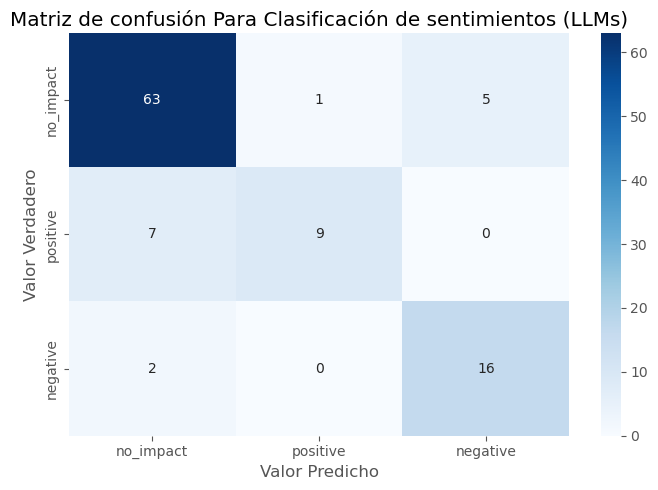

In [ ]:
accuracy = accuracy_score(list(poem_sample["label"]), list(medium_sentiment_classifier_inferences["label"]))

classification_labels = poem_sample["label"].unique()
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
conf_mat = confusion_matrix(poem_sample["label"], medium_sentiment_classifier_inferences["label"], labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Clasificación de sentimientos (LLMs)",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
poem_sample["label"]
medium_sentiment_classifier_inferences["label"]

0      no_impact
1      no_impact
2      no_impact
3      no_impact
4      no_impact
         ...    
99     no_impact
100    no_impact
101    no_impact
102    no_impact
103     negative
Name: label, Length: 104, dtype: object

In [ ]:
benchmark.loc[('Model1', "Size1"), ("Text Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size1"), ("Text Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size1"), ("Text Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size1"), ("Text Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size1"), ("Text Classification", "Metric")] =  f"Accuracy: {accuracy}"

#### Medium Size (355,361,794 Parametros)  

In [ ]:
large_sentiment_classifier = pipeline(
    task="text-classification",
    model="siebert/sentiment-roberta-large-english",
    model_kwargs={"cache_dir": cache_dir},
)

model = large_sentiment_classifier.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 355,361,794 parámetros.
El modelo tiene aproximadamente 1.32 GB en memoria.


In [ ]:
poem_sample_large = poem_sample.loc[(poem_sample["label"] == "positive") | (poem_sample["label"] == "negative")]
poem_sample_large.reset_index(drop=True, inplace=True)

In [ ]:
start_time = time.time()

large_sentiment_classifier_inference = pd.DataFrame(large_sentiment_classifier(list(poem_sample_large["verse_text"])))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
large_sentiment_classifier_inference

Tiempo tomado para inferenciar: 9.6166 Segundos...


,label,score
0,POSITIVE,0.998553
1,NEGATIVE,0.994796
2,NEGATIVE,0.982027
3,POSITIVE,0.997597
4,NEGATIVE,0.992231
5,POSITIVE,0.994944
6,POSITIVE,0.997572
7,POSITIVE,0.988509
8,NEGATIVE,0.997216
9,NEGATIVE,0.999376


accuracy: 0.8857142857142857


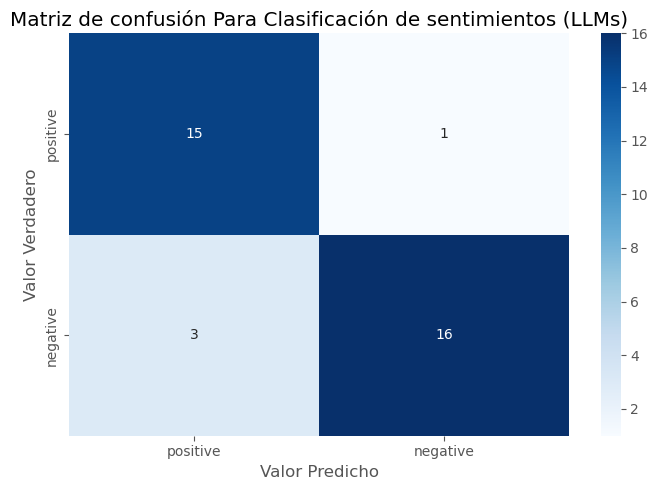

In [ ]:
accuracy = accuracy_score(list(poem_sample_large["label"]), list(large_sentiment_classifier_inference["label"].apply(lambda x: x.lower())))

classification_labels = poem_sample_large["label"].unique()
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
conf_mat = confusion_matrix(poem_sample_large["label"], large_sentiment_classifier_inference["label"].apply(lambda x: x.lower()), labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Clasificación de sentimientos (LLMs)",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
benchmark.loc[('Model1', "Size2"), ("Text Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size2"), ("Text Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size2"), ("Text Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size2"), ("Text Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size2"), ("Text Classification", "Metric")] =  f"Accuracy: {accuracy}"

In [ ]:
benchmark["Text Classification"]

Info                                                  Name Inference Time  \
Model  Size                                                                 
Model1 Size1  nickwong64/bert-base-uncased-poems-sentiment          8.256   
       Size2       siebert/sentiment-roberta-large-english         9.6166   
Model2 Size1                                           NaN            NaN   
       Size2                                           NaN            NaN   

Info         Size (GB) Qty of Parameters                        Metric  
Model  Size                                                             
Model1 Size1  0.407865         109485316  Accuracy: 0.8461538461538461  
       Size2  1.323826         355361794  Accuracy: 0.8857142857142857  
Model2 Size1       NaN               NaN                           NaN  
       Size2       NaN               NaN                           NaN

### Set 2, modelo 2

In [ ]:
glue_dataset = load_dataset(
    "nyu-mll/glue", cache_dir=cache_dir, name="mnli_matched"
)
glue_dataset

DatasetDict({
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9815
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9796
    })
})

In [ ]:
glue_sample = glue_dataset["validation"]
glue_sample = glue_sample.to_pandas().replace({"label":{0:"entailment", 1:"neutral",  2:"contradiction"}})
glue_sample = glue_sample.head(100)

In [ ]:
glue_sample["premise"]

0                        The new rights are nice enough
1     This site includes a list of all award winners...
2     uh i don't know i i have mixed emotions about ...
3     yeah i i think my favorite restaurant is alway...
4            i don't know um do you do a lot of camping
                            ...                        
95    In a further role reversal, Gingrich may have ...
96    All of the islands are now officially and prou...
97    (For more information on BLM's senior executiv...
98    While parents may pick up this gay semaphore, ...
99    Taking an ecumenical tack, nation officials in...
Name: premise, Length: 100, dtype: object

#### Small Size

In [ ]:
small_sentiment_classifier_1 = pipeline(
    task="text-classification",
    model="WeightWatcher/albert-large-v2-mnli",
    padding=True,
    model_kwargs={"cache_dir": cache_dir},
)

model = small_sentiment_classifier_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 17,687,043 parámetros.
El modelo tiene aproximadamente 0.07 GB en memoria.


In [ ]:
small_sentiment_classifier_1_inference =  small_sentiment_classifier_1(list(glue_sample.head(5)['premise']))

In [ ]:
small_sentiment_classifier_1_inference

[{'label': 'entailment', 'score': 0.46345409750938416},
 {'label': 'entailment', 'score': 0.5282965302467346},
 {'label': 'entailment', 'score': 0.5364283919334412},
 {'label': 'entailment', 'score': 0.4588928818702698},
 {'label': 'contradiction', 'score': 0.4734502136707306}]

In [ ]:
start_time = time.time()

small_sentiment_classifier_1_inference =  small_sentiment_classifier_1(list(glue_sample['hypothesis']))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
small_sentiment_classifier_1_inference = pd.DataFrame(small_sentiment_classifier_1_inference)
small_sentiment_classifier_1_inference

Tiempo tomado para inferenciar: 15.8204 Segundos...


,label,score
0,entailment,0.416266
1,entailment,0.593076
2,neutral,0.499871
3,neutral,0.512331
4,neutral,0.725124
...,...,...
95,neutral,0.705773
96,entailment,0.613642
97,entailment,0.452985
98,entailment,0.514445


accuracy: 0.38


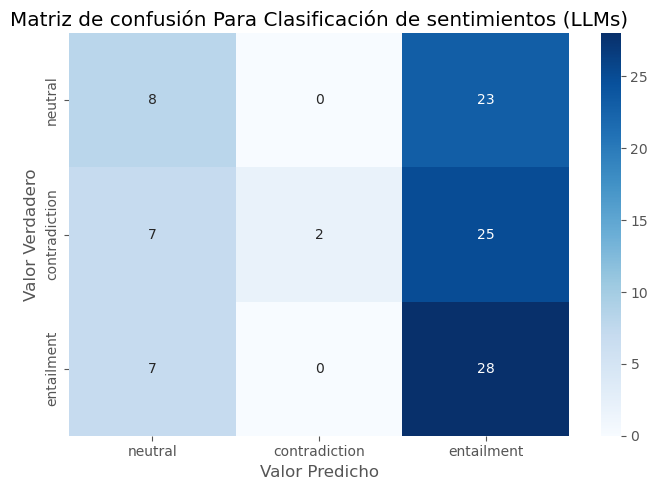

In [ ]:
accuracy = accuracy_score(list(glue_sample["label"]), list(small_sentiment_classifier_1_inference["label"]))

classification_labels = glue_sample["label"].unique()
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
conf_mat = confusion_matrix(glue_sample["label"], list(small_sentiment_classifier_1_inference["label"]), labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Clasificación de sentimientos (LLMs)",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
benchmark.loc[('Model2', "Size1"), ("Text Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size1"), ("Text Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size1"), ("Text Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size1"), ("Text Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size1"), ("Text Classification", "Metric")] =  f"Accuracy: {accuracy}"

#### Medium Size

In [ ]:
medium_sentiment_classifier_1 = pipeline(
    task="text-classification",
    model="AiManatee/RoBERTa_poem_sentiment",
    model_kwargs={"cache_dir": cache_dir},
)

model = medium_sentiment_classifier_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 124,648,708 parámetros.
El modelo tiene aproximadamente 0.46 GB en memoria.


In [ ]:
start_time = time.time()

medium_sentiment_classifier_1_inference =  medium_sentiment_classifier_1(list(poem_sample["label"]))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
medium_sentiment_classifier_1_inference = pd.DataFrame(medium_sentiment_classifier_1_inference)
medium_sentiment_classifier_1_inference

Tiempo tomado para inferenciar: 7.1454 Segundos...


,label,score
0,no_impact,0.747899
1,no_impact,0.916301
2,no_impact,0.747899
3,no_impact,0.747899
4,no_impact,0.747899
...,...,...
99,no_impact,0.747899
100,no_impact,0.747899
101,no_impact,0.747899
102,no_impact,0.747899


In [ ]:
medium_sentiment_classifier_1_inference["label"].unique()

array(['no_impact'], dtype=object)

accuracy: 0.6634615384615384


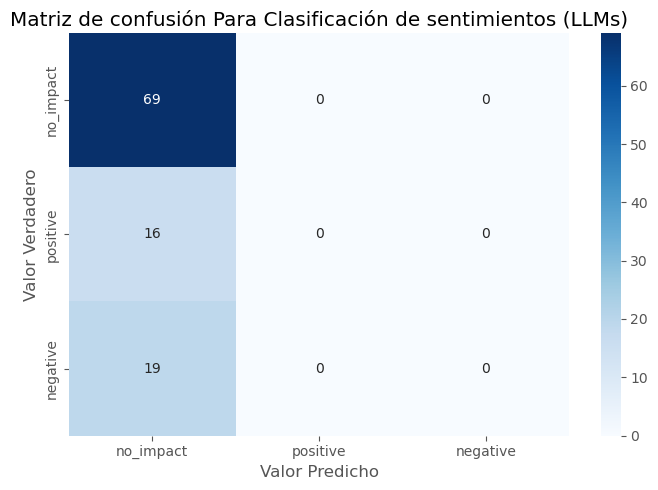

In [ ]:
accuracy = accuracy_score(list(poem_sample["label"]), list(medium_sentiment_classifier_1_inference["label"].apply(lambda x: x.lower())))

classification_labels = poem_sample["label"].unique()
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
conf_mat = confusion_matrix(poem_sample["label"], medium_sentiment_classifier_1_inference["label"].apply(lambda x: x.lower()), labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Clasificación de sentimientos (LLMs)",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
benchmark.loc[('Model2', "Size2"), ("Text Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size2"), ("Text Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size2"), ("Text Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size2"), ("Text Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size2"), ("Text Classification", "Metric")] =  f"Accuracy: {accuracy}"

In [ ]:
benchmark["Text Classification"]

Info                                                  Name Inference Time  \
Model  Size                                                                 
Model1 Size1  nickwong64/bert-base-uncased-poems-sentiment         5.9385   
       Size2       siebert/sentiment-roberta-large-english         4.4536   
Model2 Size1            WeightWatcher/albert-large-v2-mnli        10.8738   
       Size2              AiManatee/RoBERTa_poem_sentiment         5.1049   

Info         Size (GB) Qty of Parameters                        Metric  
Model  Size                                                             
Model1 Size1  0.407865         109485316  Accuracy: 0.8461538461538461  
       Size2  1.323826         355361794  Accuracy: 0.8857142857142857  
Model2 Size1  0.065889          17687043                Accuracy: 0.38  
       Size2  0.464353         124648708  Accuracy: 0.6634615384615384

## Traducción

In [ ]:
translation_dataset = load_dataset(
    "okezieowen/english_to_spanish", cache_dir=cache_dir,
)

In [ ]:
translation_dataset

DatasetDict({
    train: Dataset({
        features: ['English', 'Spanish'],
        num_rows: 149988
    })
})

### Set 3, modelo 1

In [ ]:
translation_dataset = translation_dataset["train"].to_pandas()

In [ ]:
translation_dataset

,English,Spanish
0,I declare resumed the session of the European ...,Declaro reanudado el período de sesiones del P...
1,"Although, as you will have seen, the dreaded '...","Como todos han podido comprobar, el gran ""efec..."
2,You have requested a debate on this subject in...,Sus Señorías han solicitado un debate sobre el...
3,"In the meantime, I should like to observe a mi...","A la espera de que se produzca, de acuerdo con..."
4,"Please rise, then, for this minute' s silence.",Invito a todos a que nos pongamos de pie para ...
...,...,...
149983,Let them make do with the Internet!,¿Piden los pueblos democracia?
149984,Aparicio Sánchez report (A5-0122/2001),Que se conformen pues con Internet.
149985,"Mr President, I hope you and all the interpret...",Informe Aparicio Sánchez (A5-0122/2001)
149986,I have voted for this report and it was my sis...,"Señor Presidente, deseo buen provecho tanto a ..."


In [ ]:
sample_for_translation = translation_dataset.head(5)

#### Small Size

In [ ]:
small_translation = pipeline(
    task="translation",
    #model="google-t5/t5-small",
    model="SEBIS/legal_t5_small_trans_es_en_small_finetuned",
    model_kwargs={"cache_dir": cache_dir},
)

model = small_translation.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 60,506,624 parámetros.
El modelo tiene aproximadamente 0.23 GB en memoria.


/Users/user/Documents/ITLA/2024 C3/NLP/segundo periodo/LLMs Aplications/env/lib/python3.12/site-packages/transformers/pipelines/__init__.py:1140: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_es_to_en"
  warnings.warn(


In [ ]:
start_time = time.time()

small_translation_inference =  small_translation(list(sample_for_translation["Spanish"]))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
small_translation_inference = pd.DataFrame(small_translation_inference)
small_translation_inference

Tiempo tomado para inferenciar: 6.1565 Segundos...


,translation_text
0,I declare resumed the session of the European ...
1,"As everyone has seen, the great 'effect of the..."
2,The honourable Members have requested a debate...
3,"Until this happens, in agreement with many of ..."
4,I invite everyone to stand up and observe a mi...


In [ ]:
small_translation_inference.iloc[0]["translation_text"]

'I declare resumed the session of the European Parliament adjourned on Friday, 17 December, and I would once again like to wish you a good holiday.'

In [ ]:
# Cargar la métrica Bleu
bleu = load("bleu")

# Extraer las referencias de "English" desde sample_for_summary
reference_translations = [item for item in list(sample_for_translation["English"])]


# Calcular ROUGE asegurándote de que ambos son listas de texto
bleu = f"{bleu.compute(predictions=small_translation_inference["translation_text"], references=reference_translations)['bleu']:.4f}"

print("Bleu metric:", bleu)

Bleu metric: 0.2682


In [ ]:
benchmark.loc[('Model1', "Size1"), ("Translation", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size1"), ("Translation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size1"), ("Translation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size1"), ("Translation", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size1"), ("Translation", "Metric")] =  f"Bleu: {bleu}"

#### Medium Size

In [ ]:
medium_translation = pipeline(
    task="translation",
    #model="google-t5/t5-base",
    model="zainnaved/marian-finetuned-kde4-en-to-es",
    model_kwargs={"cache_dir": cache_dir},
)

model = medium_translation .model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 77,943,296 parámetros.
El modelo tiene aproximadamente 0.29 GB en memoria.


In [ ]:


start_time = time.time()

medium_translation_inference =  medium_translation(list(sample_for_translation["English"]))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
medium_translation_inference = pd.DataFrame(medium_translation_inference)
medium_translation_inference

Tiempo tomado para inferenciar: 7.0012 Segundos...


,translation_text
0,Declaro reanudado el período de sesiones del P...
1,"Aunque, como habrá visto, el temido « error de..."
2,Ha solicitado un diálogo sobre este tema en lo...
3,"Mientras tanto, me gustaría guardar un minuto ..."
4,"Por favor, párese, entonces, para el silencio ..."


In [ ]:
medium_translation_inference["translation_text"].iloc[0]

'Declaro reanudado el período de sesiones del Parlamento Europeo interrumpido el viernes 17 de diciembre de 1999 y deseo desearle una vez más un feliz año nuevo con la esperanza de que disfrute de un agradable período festivo.'

In [ ]:
# Cargar la métrica Bleu
bleu = load("bleu")

# Extraer las referencias de "English" desde sample_for_summary
reference_translations = [item for item in list(sample_for_translation["Spanish"])]


# Calcular ROUGE asegurándote de que ambos son listas de texto
bleu = f"{bleu.compute(predictions=medium_translation_inference["translation_text"], references=reference_translations)['bleu']:.4f}"

print("Bleu metric:", bleu)

Bleu metric: 0.2116


In [ ]:
benchmark.loc[('Model1', "Size2"), ("Translation", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size2"), ("Translation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size2"), ("Translation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size2"), ("Translation", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size2"), ("Translation", "Metric")] =  f"Bleu: {bleu}"

In [ ]:
benchmark["Translation"]

Info                                                      Name Inference Time  \
Model  Size                                                                     
Model1 Size1  SEBIS/legal_t5_small_trans_es_en_small_finetuned         6.1565   
       Size2          zainnaved/marian-finetuned-kde4-en-to-es         7.0012   
Model2 Size1                                               NaN            NaN   
       Size2                                               NaN            NaN   

Info         Size (GB) Qty of Parameters        Metric  
Model  Size                                             
Model1 Size1  0.225405          60506624  Bleu: 0.2682  
       Size2  0.290361          77943296  Bleu: 0.2116  
Model2 Size1       NaN               NaN           NaN  
       Size2       NaN               NaN           NaN

### Set 3, modelo 2

#### Small Size

In [ ]:
small_translation_1 = pipeline(
    task="translation",
    model="Helsinki-NLP/opus-mt-en-es",
    model_kwargs={"cache_dir": cache_dir},
)


model = small_translation_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 77,943,296 parámetros.
El modelo tiene aproximadamente 0.29 GB en memoria.


In [ ]:
start_time = time.time()

small_translation_1_inference = small_translation_1(list(sample_for_translation["English"]))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
small_translation_1_inference = pd.DataFrame(small_translation_1_inference)
small_translation_1_inference

Tiempo tomado para inferenciar: 7.0055 Segundos...


,translation_text
0,Declaro reanudado el período de sesiones del P...
1,"Aunque, como habrán visto, el temido ""bug del ..."
2,Usted ha solicitado un debate sobre este tema ...
3,"Mientras tanto, me gustaría guardar un minuto ..."
4,"Por favor, levántate, entonces, por el silenci..."


In [ ]:
small_translation_1_inference.iloc[0]["translation_text"]

'Declaro reanudado el período de sesiones del Parlamento Europeo interrumpido el viernes 17 de diciembre de 1999 y quisiera desearle una vez más un feliz año nuevo con la esperanza de que haya disfrutado de un agradable período festivo.'

In [ ]:
# Cargar la métrica Bleu
bleu = load("bleu")

# Extraer las referencias de "English" desde sample_for_summary
reference_translations = [item for item in list(sample_for_translation["Spanish"])]


# Calcular ROUGE asegurándote de que ambos son listas de texto
bleu = f"{bleu.compute(predictions=small_translation_1_inference["translation_text"], references=reference_translations)['bleu']:.4f}"

print("Bleu metric:", bleu)

Bleu metric: 0.2305


In [ ]:
benchmark.loc[('Model2', "Size1"), ("Translation", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size1"), ("Translation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size1"), ("Translation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size1"), ("Translation", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size1"), ("Translation", "Metric")] =  f"Bleu: {bleu}"

In [ ]:
benchmark["Translation"]

Info                                                      Name Inference Time  \
Model  Size                                                                     
Model1 Size1  SEBIS/legal_t5_small_trans_es_en_small_finetuned         6.1565   
       Size2          zainnaved/marian-finetuned-kde4-en-to-es         7.0012   
Model2 Size1                        Helsinki-NLP/opus-mt-en-es         7.0055   
       Size2                                               NaN            NaN   

Info         Size (GB) Qty of Parameters        Metric  
Model  Size                                             
Model1 Size1  0.225405          60506624  Bleu: 0.2682  
       Size2  0.290361          77943296  Bleu: 0.2116  
Model2 Size1  0.290361          77943296  Bleu: 0.2305  
       Size2       NaN               NaN           NaN

#### Large Size

In [ ]:
translation_dataset_l1 = load_dataset(
    "seedboxai/german_to_english_translations_v1", cache_dir=cache_dir,
)

sample_for_translation_l1 = translation_dataset_l1["test"]
sample_for_translation_l1 = sample_for_translation_l1.to_pandas()


#### PENDING FOR RUNNING - THE ONE BELOW SHOULD BE THE REPLACEMENT

In [ ]:
# Descargar solo las columnas "original" y "translation" del conjunto de prueba
translation_dataset_l1 = load_dataset(
    "seedboxai/german_to_english_translations_v1",
    split="test",
    cache_dir=cache_dir,
).select_columns(["original", "translation"])

# Convertir a DataFrame y renombrar las columnas
sample_for_translation_l1 = translation_dataset_l1.to_pandas()
sample_for_translation_l1.columns = ["English", "German"]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

In [ ]:
sample_for_translation_l1_ = sample_for_translation_l1.head(10)
sample_for_translation_l1_

,English,German
0,Absolutely! There were many ancient manuscript...,Natürlich! In Drago's Schatz waren viele alte ...
1,Certainly. The proposed system of public healt...,Selbstverständlich. Das vorgeschlagene System ...
2,Spicy Black Bean Soup Recipe:\n\nIngredients:\...,Rezept für würzige schwarze Bohnensuppe:\n\nZu...
3,Chaucer explored various themes and motifs in ...,Chaucer erkundete in seinen literarischen Werk...
4,"Massachusetts' nickname, the “Bay State,” refe...","Der Spitzname von Massachusetts, der ""Bay Stat..."
5,Write a 1500-word article exploring the benefi...,"Schreibe einen 1500-Wörter-Artikel, der die Vo..."
6,Sure! Here are a few tips for using a foam rol...,Natürlich! Hier sind ein paar Tipps zur effekt...
7,Of course! One moment that particularly stands...,"Natürlich! Ein Moment, der mir besonders in Er..."
8,Write a dystopian story set in a world where b...,"Schreibe eine dystopische Geschichte, die in e..."
9,['Possible answer:\nThe paper discusses severa...,Der Artikel diskutiert mehrere Limitationen de...


In [ ]:
large_translation_1 = pipeline(
    task="translation_en_to_de",
    model="google-t5/t5-base",
    max_length=500,
    model_kwargs={"cache_dir": cache_dir},

)

model = large_translation_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 222,903,552 parámetros.
El modelo tiene aproximadamente 0.83 GB en memoria.


In [ ]:
start_time = time.time()

large_translation_1_inference = pd.DataFrame(large_translation_1(sample_for_translation_l1_["English"].to_list()))
end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
large_translation_1_inference

Tiempo tomado para inferenciar: 76.9662 Segundos...


,translation_text
0,Einer der seltensten Manuskripte in Dragos Sch...
1,Gewiss. Das vorgeschlagene System der öffentli...
2,Spicy Black Bean Soup Recipe: Ingredients: - 1...
3,Chaucer studierte verschiedene Themen und Moti...
4,Massachusetts ist ein Bundesstaat in der Provi...
5,"Schreiben Sie einen 1500-Wort-Artikel, der die..."
6,"Das Rollen kann manchmal unangenehm sein, aber..."
7,Während dieser Zeit war Whiskers eine konstant...
8,In this course you will learn how to write a d...
9,['Possible answer:nThe paper discusses several...


In [ ]:
large_translation_1_inference.iloc[0]["translation_text"]

'Einer der seltensten Manuskripte in Dragos Schatz war das Grimoire von Gaia, das von einer mächtigen Zaubererin geschrieben wurde, die die Magie in den Tiefen der Erde studierte. Das Buch enthielt Zauber zur Kontrolle von Erde, Luft, Feuer und Wasser und war für einige der mächtigsten Naturkatastrophen in der Geschichte verantwortlich.'

In [ ]:
# Cargar la métrica Bleu
bleu = load("bleu")

# Extraer las referencias de "English" desde sample_for_summary
reference_translations = [item for item in list(sample_for_translation_l1_["German"])]


# Calcular ROUGE asegurándote de que ambos son listas de texto
bleu = f"{bleu.compute(predictions=large_translation_1_inference["translation_text"], references=reference_translations)['bleu']:.4f}"

print("Bleu metric:", bleu)

Bleu metric: 0.0175


In [ ]:
benchmark.loc[('Model2', "Size2"), ("Translation", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size2"), ("Translation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size2"), ("Translation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size2"), ("Translation", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size2"), ("Translation", "Metric")] =  f"Bleu: {bleu}"

In [ ]:
benchmark["Translation"]

Info                                                      Name Inference Time  \
Model  Size                                                                     
Model1 Size1  SEBIS/legal_t5_small_trans_es_en_small_finetuned         6.1565   
       Size2          zainnaved/marian-finetuned-kde4-en-to-es         7.0012   
Model2 Size1                        Helsinki-NLP/opus-mt-en-es         7.0055   
       Size2                                 google-t5/t5-base        76.9662   

Info         Size (GB) Qty of Parameters        Metric  
Model  Size                                             
Model1 Size1  0.225405          60506624  Bleu: 0.2682  
       Size2  0.290361          77943296  Bleu: 0.2116  
Model2 Size1  0.290361          77943296  Bleu: 0.2305  
       Size2   0.83038         222903552  Bleu: 0.0175

## Generación de texto

In [ ]:
incomplete_sentences = [ # 50 Oraciones Incompletas para dejar que el modelo genere texto.
    "The advancements in artificial intelligence are leading to",
    "In a world where technology continues to evolve, one day we might",
    "The future of humanity lies in the ability to merge",
    "When scientists discovered the new form of energy, they realized",
    "As I walked through the forest that day, I suddenly saw",
    "The secret to achieving true happiness is to",
    "With the discovery of life on another planet, scientists now",
    "After years of research, they finally created a device that can",
    "In the year 2050, the world has transformed into a place where",
    "Despite all the challenges, she believed that one day she would",
    "In the quiet of the evening, I heard a voice whisper",
    "The invention that changed the world forever was",
    "As they ventured into the unknown, the explorers discovered",
    "The book he left behind contained secrets about",
    "In the midst of chaos, she managed to find",
    "With great determination, he decided to pursue",
    "The ancient artifact was believed to hold the power to",
    "After analyzing the data, the scientist concluded that",
    "The unexpected letter he received revealed",
    "At the edge of the universe, there exists",
    "When I opened the mysterious box, I found",
    "The truth about her past was finally uncovered by",
    "As the rain poured down, I remembered",
    "In the heart of the city lies a hidden",
    "For generations, people have searched for",
    "In the silence of the night, a faint sound of",
    "The key to solving the mystery was hidden within",
    "In a world dominated by technology, humans have forgotten",
    "The hero stood before the crowd, ready to",
    "The strange object they discovered in the desert was",
    "During the experiment, the team noticed a strange",
    "The prophecy foretold that only one person could",
    "On the day of the celebration, everyone gathered to",
    "With newfound courage, she set out to",
    "In a remote village, people believe in the power of",
    "As they reached the summit of the mountain, they saw",
    "The purpose of the secret organization was to",
    "At the break of dawn, the soldiers prepared to",
    "Her dream was to create a world where everyone could",
    "After years of conflict, the two sides finally agreed to",
    "The sound of laughter filled the air as they began to",
    "For the first time in history, humans have the ability to",
    "The recipe handed down from her grandmother contained",
    "With only a map and a compass, he set out to find",
    "In the ancient library, she found a book that described",
    "They say the waterfall in the forest has the power to",
    "Her invention had the potential to change",
    "At the end of the journey, they discovered",
    "The artifact was a relic from a civilization that",
    "With a deep breath, he stepped forward and declared",
]


In [ ]:
len(incomplete_sentences)

50

### Set 4, modelo 1

#### Small Size

In [ ]:
small_generator = pipeline(
    "text-generation", model="gpt2", # El mas pequeño de GPT2
    model_kwargs={"cache_dir": cache_dir},

    # Configuración de generación
    max_length=50,        # Longitud máxima del texto generado
    num_return_sequences=1, # Número de secuencias a generar
    do_sample=True,       # Usar muestreo probabilístico
    temperature=0.7,      # Control de creatividad
    top_k=50,            # Filtro de top-k tokens
    top_p=0.95,          # Nucleus sampling
    pad_token_id=50256,   # EOS token ID para GPT-2
    truncation=True

)

model = small_generator.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 124,439,808 parámetros.
El modelo tiene aproximadamente 0.46 GB en memoria.


In [ ]:
start_time = time.time()

small_generator_inference = [small_generator(sentence, truncation="longest_first", max_length=100)[0]["generated_text"] for sentence in incomplete_sentences]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
small_generator_inference

Tiempo tomado para inferenciar: 235.7916 Segundos...


['The advancements in artificial intelligence are leading to a new generation of scientists who are able to make a machine that is much more like a person.\n\n"We are going to find new ways of making people better."\n\nThe new robot, dubbed the LAMC-1, will be able to recognize humans without knowing they\'re there.\n\n"It\'s amazing how much that could change how people perceive, interact with and interact with robots," said LAMC-1 co-founder',
 'In a world where technology continues to evolve, one day we might see more and more people making apps that do that for us, and I think that\'s great news for the future of social media."\n\nBut there is also a risk that this change is less about the future of apps, and more about the future of our smartphones and tablets. "There are a lot of things that could be better done with a little bit more power and less fuss, but there are also things that are better',
 "The future of humanity lies in the ability to merge with nature.\n\nA lot of wha

In [ ]:
print(small_generator_inference[0]) # Viendo si tiene sentido.

The advancements in artificial intelligence are leading to a new generation of scientists who are able to make a machine that is much more like a person.

"We are going to find new ways of making people better."

The new robot, dubbed the LAMC-1, will be able to recognize humans without knowing they're there.

"It's amazing how much that could change how people perceive, interact with and interact with robots," said LAMC-1 co-founder


In [ ]:

perplexities = [] # Arreglo vacío para calcular perplexities.

for  sentence in incomplete_sentences:
    # Tokenizar el texto utilizando  el tokenizer del pipeline
    inputs = small_generator.tokenizer(sentence, return_tensors="pt") # return tensor for pytorch

    with torch.no_grad():
        outputs = small_generator.model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss

    # Calcular la perplejidad
    perplexity = torch.exp(loss)
    perplexities.append(perplexity)

perplexities = [p.item() for p in perplexities]
perplexities

[36.4392204284668,
 19.059797286987305,
 34.46731185913086,
 44.14057922363281,
 31.005970001220703,
 40.8111572265625,
 24.360328674316406,
 24.99569320678711,
 19.62407875061035,
 26.386611938476562,
 21.95577621459961,
 161.3514404296875,
 41.541786193847656,
 162.34567260742188,
 21.615110397338867,
 51.64354705810547,
 46.86966323852539,
 25.8742618560791,
 526.4220581054688,
 26.16121482849121,
 28.806222915649414,
 130.45065307617188,
 46.4008674621582,
 21.772619247436523,
 31.85970687866211,
 25.788667678833008,
 71.14441680908203,
 34.58007049560547,
 46.32122802734375,
 81.7161865234375,
 32.886451721191406,
 82.15933227539062,
 23.123207092285156,
 50.107444763183594,
 46.07823181152344,
 17.45756721496582,
 56.54601287841797,
 41.83182144165039,
 14.204627990722656,
 19.31768035888672,
 23.404773712158203,
 8.344813346862793,
 583.8583984375,
 32.002784729003906,
 46.38890838623047,
 60.55354690551758,
 42.391868591308594,
 13.932894706726074,
 55.70965576171875,
 33.33602

In [ ]:
df_small_gen_sentences_perpl = pd.DataFrame({"Generated Sentence": small_generator_inference, "Perplexity": perplexities})
df_small_gen_sentences_perpl

,Generated Sentence,Perplexity
0,The advancements in artificial intelligence ar...,47.441746
1,In a world where technology continues to evolv...,19.946609
2,The future of humanity lies in the ability to ...,29.846401
3,When scientists discovered the new form of ene...,41.350029
4,"As I walked through the forest that day, I sud...",18.491995
5,The secret to achieving true happiness is to b...,37.926476
6,"With the discovery of life on another planet, ...",13.808712
7,"After years of research, they finally created ...",17.998035
8,"In the year 2050, the world has transformed in...",20.325085
9,"Despite all the challenges, she believed that ...",20.752316


In [ ]:
benchmark.loc[('Model1', "Size1"), ("Text Generation", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size1"), ("Text Generation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size1"), ("Text Generation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size1"), ("Text Generation", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size1"), ("Text Generation", "Metric")] =  f"Average perplexity: {np.mean(perplexities)}"

In [ ]:
benchmark["Text Generation"]

Info          Name Inference Time Size (GB) Qty of Parameters  \
Model  Size                                                     
Model1 Size1  gpt2       235.7916  0.463574         124439808   
       Size2   NaN            NaN       NaN               NaN   
Model2 Size1   NaN            NaN       NaN               NaN   
       Size2   NaN            NaN       NaN               NaN   

Info                                         Metric  
Model  Size                                          
Model1 Size1  Average perplexity: 63.79095924377442  
       Size2                                    NaN  
Model2 Size1                                    NaN  
       Size2                                    NaN

#### Medium Size

In [ ]:
medium_generator = pipeline(
    "text-generation", model="gpt2-medium", # El mediano de GPT2
    model_kwargs={"cache_dir": cache_dir},

    # Configuración de generación
    max_length=50,        # Longitud máxima del texto generado
    num_return_sequences=1, # Número de secuencias a generar
    do_sample=True,       # Usar muestreo probabilístico
    temperature=0.7,      # Control de creatividad
    top_k=50,            # Filtro de top-k tokens
    top_p=0.95,          # Nucleus sampling
    pad_token_id=50256,   # EOS token ID para GPT-2
    truncation=True
)

model = medium_generator.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 354,823,168 parámetros.
El modelo tiene aproximadamente 1.32 GB en memoria.


In [ ]:
start_time = time.time()

medium_generator_inference = [medium_generator(sentence, truncation="longest_first", max_length=100)[0]["generated_text"] for sentence in incomplete_sentences]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
medium_generator_inference

Tiempo tomado para inferenciar: 450.3852 Segundos...


['The advancements in artificial intelligence are leading to the creation of intelligent machines that could be used to assist with the maintenance of human society, but many of these machines may not be able to cope with our current challenges.\n\nThe most significant advancement in artificial intelligence is the development of "machine learning" – the ability to learn from experience. In artificial intelligence, computers are able to learn from past experiences and then apply that knowledge to create a new, smarter machine.\n\nOne way machine learning is used',
 'In a world where technology continues to evolve, one day we might be able to use a simple piece of glass to tell the difference between a living organism and a lifeless one.\n\nScientists at the University of California at Irvine have developed a type of glass that can detect the presence of living cells inside a cell. The device, called the cell-based microfluidic system (CBMS), is a key part of a new technology being devel

In [ ]:
print(medium_generator_inference[0])

The advancements in artificial intelligence are leading to the creation of intelligent machines that could be used to assist with the maintenance of human society, but many of these machines may not be able to cope with our current challenges.

The most significant advancement in artificial intelligence is the development of "machine learning" – the ability to learn from experience. In artificial intelligence, computers are able to learn from past experiences and then apply that knowledge to create a new, smarter machine.

One way machine learning is used


In [ ]:

perplexities = [] # Arreglo vacío para calcular perplexities.

for  sentence in incomplete_sentences:
    # Tokenizar el texto utilizando  el tokenizer del pipeline
    inputs = medium_generator.tokenizer(sentence, return_tensors="pt") # return tensor for pytorch

    with torch.no_grad():
        outputs = medium_generator.model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss

    # Calcular la perplejidad
    perplexity = torch.exp(loss)
    perplexities.append(perplexity)

perplexities = [p.item() for p in perplexities]
perplexities

[47.44174575805664,
 19.946609497070312,
 29.84640121459961,
 41.35002899169922,
 18.491994857788086,
 37.926475524902344,
 13.808712005615234,
 17.998035430908203,
 20.325084686279297,
 20.752315521240234,
 15.81444263458252,
 118.67166137695312,
 30.987804412841797,
 146.37506103515625,
 16.962440490722656,
 66.50182342529297,
 41.01630783081055,
 15.358922958374023,
 553.356201171875,
 14.458283424377441,
 19.778684616088867,
 68.53721618652344,
 23.94940757751465,
 16.513822555541992,
 32.74993896484375,
 14.875834465026855,
 47.03964614868164,
 28.143938064575195,
 40.90784454345703,
 90.03572082519531,
 21.717357635498047,
 37.7556266784668,
 21.461238861083984,
 55.53892517089844,
 29.602333068847656,
 9.218260765075684,
 40.60610580444336,
 18.44229507446289,
 11.84510612487793,
 11.569950103759766,
 18.823453903198242,
 7.375147342681885,
 203.1672821044922,
 19.679168701171875,
 35.31068420410156,
 36.77849197387695,
 36.20113754272461,
 10.718667984008789,
 60.46562957763672

In [ ]:
df_medium_gen_sentences_perpl = pd.DataFrame({"Generated Sentence": medium_generator_inference, "Perplexity": perplexities})
df_medium_gen_sentences_perpl


,Generated Sentence,Perplexity
0,The advancements in artificial intelligence ar...,47.441746
1,In a world where technology continues to evolv...,19.946609
2,The future of humanity lies in the ability to ...,29.846401
3,When scientists discovered the new form of ene...,41.350029
4,"As I walked through the forest that day, I sud...",18.491995
5,The secret to achieving true happiness is to l...,37.926476
6,"With the discovery of life on another planet, ...",13.808712
7,"After years of research, they finally created ...",17.998035
8,"In the year 2050, the world has transformed in...",20.325085
9,"Despite all the challenges, she believed that ...",20.752316


In [ ]:
benchmark.loc[('Model1', "Size2"), ("Text Generation", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size2"), ("Text Generation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size2"), ("Text Generation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size2"), ("Text Generation", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size2"), ("Text Generation", "Metric")] =  f"Average perplexity: {np.mean(perplexities)}"

### Set 4, modelo 2

#### Small Size

In [ ]:
small_generator_1 = pipeline(
    task="text-generation",
    model="microsoft/DialoGPT-small",
    model_kwargs={"cache_dir": cache_dir},

    # Configuración de generación
    max_length=50,        # Longitud máxima del texto generado
    num_return_sequences=1, # Número de secuencias a generar
    do_sample=True,       # Usar muestreo probabilístico
    temperature=0.7,      # Control de creatividad
    top_k=50,            # Filtro de top-k tokens
    top_p=0.95,          # Nucleus sampling
    pad_token_id=50256,   # EOS token ID para GPT-2
    truncation=True
)

model = small_generator_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 124,439,808 parámetros.
El modelo tiene aproximadamente 0.46 GB en memoria.


In [ ]:
start_time = time.time()

small_generator_1_inference = [small_generator_1(sentence, truncation="longest_first", max_length=100)[0]["generated_text"] for sentence in incomplete_sentences]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
small_generator_1_inference

Tiempo tomado para inferenciar: 16.9203 Segundos...


['The advancements in artificial intelligence are leading to a future of peace and order.',
 'In a world where technology continues to evolve, one day we might be able to do that.',
 'The future of humanity lies in the ability to merge three or more of these things.',
 'When scientists discovered the new form of energy, they realized the power of matter is the power of matter.',
 'As I walked through the forest that day, I suddenly saw a giant statue of a tree',
 'The secret to achieving true happiness is to stop eating meat.',
 'With the discovery of life on another planet, scientists now discover life on other planets!',
 'After years of research, they finally created a device that can detect the heart rate from your heart rate.',
 'In the year 2050, the world has transformed into a place where you can make and enjoy a good meal.',
 'Despite all the challenges, she believed that one day she would go back and do her homework',
 "In the quiet of the evening, I heard a voice whisper'The

In [ ]:
print(small_generator_1_inference[0])

The advancements in artificial intelligence are leading to a future of peace and order.


In [ ]:

perplexities = [] # Arreglo vacío para calcular perplexities.

for  sentence in incomplete_sentences:
    # Tokenizar el texto utilizando  el tokenizer del pipeline
    inputs = small_generator_1.tokenizer(sentence, return_tensors="pt") # return tensor for pytorch

    with torch.no_grad():
        outputs = small_generator_1.model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss

    # Calcular la perplejidad
    perplexity = torch.exp(loss)
    perplexities.append(perplexity)

perplexities = [p.item() for p in perplexities]
perplexities

[75.20668029785156,
 158.69947814941406,
 128.48069763183594,
 349.7920837402344,
 251.6754913330078,
 89.39590454101562,
 657.7110595703125,
 164.04637145996094,
 190.09722900390625,
 265.13720703125,
 678.32568359375,
 95.51153564453125,
 1292.83984375,
 371.82000732421875,
 692.0060424804688,
 2390.437255859375,
 134.18423461914062,
 593.8638305664062,
 2746.577392578125,
 368.3653564453125,
 650.5374755859375,
 562.1292724609375,
 2046.1776123046875,
 414.8588562011719,
 894.4588012695312,
 780.4979858398438,
 248.8794708251953,
 636.14453125,
 5047.44775390625,
 167.88009643554688,
 2680.970703125,
 61.009037017822266,
 718.3629150390625,
 1009.6556396484375,
 506.80511474609375,
 253.83416748046875,
 118.10392761230469,
 1454.71337890625,
 44.247703552246094,
 458.1981201171875,
 161.70318603515625,
 168.57363891601562,
 4450.4208984375,
 215.23548889160156,
 382.66986083984375,
 130.34103393554688,
 160.44970703125,
 480.05633544921875,
 90.53653717041016,
 1194.9051513671875]

In [ ]:
df_small_1_gen_sentences_perpl = pd.DataFrame({"Generated Sentence": small_generator_1_inference, "Perplexity": perplexities})
df_small_1_gen_sentences_perpl


,Generated Sentence,Perplexity
0,The advancements in artificial intelligence ar...,75.206680
1,In a world where technology continues to evolv...,158.699478
2,The future of humanity lies in the ability to ...,128.480698
3,When scientists discovered the new form of ene...,349.792084
4,"As I walked through the forest that day, I sud...",251.675491
5,The secret to achieving true happiness is to s...,89.395905
6,"With the discovery of life on another planet, ...",657.711060
7,"After years of research, they finally created ...",164.046371
8,"In the year 2050, the world has transformed in...",190.097229
9,"Despite all the challenges, she believed that ...",265.137207


In [ ]:
benchmark.loc[('Model2', "Size1"), ("Text Generation", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size1"), ("Text Generation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size1"), ("Text Generation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size1"), ("Text Generation", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size1"), ("Text Generation", "Metric")] =  f"Average perplexity: {np.mean(perplexities)}"

#### Large Size

In [ ]:
large_generator_1 = pipeline(
    "text-generation", model="microsoft/DialoGPT-large", # 2.7 billones de parametros
    model_kwargs={"cache_dir": cache_dir},

    # Configuración de generación
    max_length=50,        # Longitud máxima del texto generado
    num_return_sequences=1, # Número de secuencias a generar
    do_sample=True,       # Usar muestreo probabilístico
    temperature=0.7,      # Control de creatividad
    top_k=50,            # Filtro de top-k tokens
    top_p=0.95,          # Nucleus sampling
    pad_token_id=50256,   # EOS token ID para GPT-2
    truncation=True
)

model = large_generator_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 774,030,080 parámetros.
El modelo tiene aproximadamente 2.88 GB en memoria.


In [ ]:
start_time = time.time()

large_generator_1_inference = [large_generator_1(sentence, truncation="longest_first", max_length=100)[0]["generated_text"] for sentence in incomplete_sentences]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
large_generator_1_inference

Tiempo tomado para inferenciar: 88.7574 Segundos...


['The advancements in artificial intelligence are leading to a new meta.',
 'In a world where technology continues to evolve, one day we might find out if that technology will be worth it.',
 'The future of humanity lies in the ability to merge all the best features of the previous generations.',
 'When scientists discovered the new form of energy, they realized that the energy of the nuclear power plants.',
 'As I walked through the forest that day, I suddenly saw a black hole.',
 'The secret to achieving true happiness is to play with the little boy.',
 'With the discovery of life on another planet, scientists now have the ability to see their own galaxy.',
 'After years of research, they finally created a device that can withstand a high caliber bullet to the head.',
 'In the year 2050, the world has transformed into a place where humans are actually living.',
 'Despite all the challenges, she believed that one day she would learn.',
 "In the quiet of the evening, I heard a voice wh

In [ ]:
print(large_generator_1_inference[0])

The advancements in artificial intelligence are leading to a new meta.


In [ ]:

perplexities = [] # Arreglo vacío para calcular perplexities.

for  sentence in incomplete_sentences:
    # Tokenizar el texto utilizando  el tokenizer del pipeline
    inputs = large_generator_1.tokenizer(sentence, return_tensors="pt") # return tensor for pytorch

    with torch.no_grad():
        outputs = large_generator_1.model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss

    # Calcular la perplejidad
    perplexity = torch.exp(loss)
    perplexities.append(perplexity)

perplexities = [p.item() for p in perplexities]
perplexities

[86.4425277709961,
 115.37690734863281,
 111.75117492675781,
 255.60504150390625,
 164.26953125,
 60.67809295654297,
 257.1209716796875,
 91.36827087402344,
 94.65205383300781,
 154.6094970703125,
 252.07423400878906,
 197.93450927734375,
 605.4110107421875,
 537.3984375,
 292.4465026855469,
 570.32080078125,
 115.94828796386719,
 458.7554016113281,
 5125.3740234375,
 184.7517852783203,
 268.78045654296875,
 292.40606689453125,
 781.47998046875,
 82.61290740966797,
 1762.1717529296875,
 107.66260528564453,
 102.68138885498047,
 300.29742431640625,
 892.5151977539062,
 217.56503295898438,
 740.41064453125,
 109.77156066894531,
 287.73699951171875,
 2151.0302734375,
 161.15927124023438,
 192.96713256835938,
 79.46022033691406,
 403.86993408203125,
 42.12229537963867,
 301.23150634765625,
 97.05018615722656,
 44.535308837890625,
 2281.102783203125,
 89.81026458740234,
 271.9473571777344,
 116.9812240600586,
 168.8507080078125,
 155.35775756835938,
 79.1382827758789,
 459.6077880859375]

In [ ]:
df_large_1_gen_sentences_perpl = pd.DataFrame({"Generated Sentence": large_generator_1_inference, "Perplexity": perplexities})
df_large_1_gen_sentences_perpl


,Generated Sentence,Perplexity
0,The advancements in artificial intelligence ar...,86.442528
1,In a world where technology continues to evolv...,115.376907
2,The future of humanity lies in the ability to ...,111.751175
3,When scientists discovered the new form of ene...,255.605042
4,"As I walked through the forest that day, I sud...",164.269531
5,The secret to achieving true happiness is to p...,60.678093
6,"With the discovery of life on another planet, ...",257.120972
7,"After years of research, they finally created ...",91.368271
8,"In the year 2050, the world has transformed in...",94.652054
9,"Despite all the challenges, she believed that ...",154.609497


In [ ]:
benchmark.loc[('Model2', "Size2"), ("Text Generation", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size2"), ("Text Generation", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size2"), ("Text Generation", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size2"), ("Text Generation", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size2"), ("Text Generation", "Metric")] =  f"Average perplexity: {np.mean(perplexities)}"

In [ ]:
benchmark["Text Generation"]

Info                              Name Inference Time Size (GB)  \
Model  Size                                                       
Model1 Size1                      gpt2       235.7916  0.463574   
       Size2               gpt2-medium       450.3852  1.321819   
Model2 Size1  microsoft/DialoGPT-small        16.9203  0.463574   
       Size2  microsoft/DialoGPT-large        88.7574  2.883487   

Info         Qty of Parameters                                  Metric  
Model  Size                                                             
Model1 Size1         124439808   Average perplexity: 63.79095924377442  
       Size2         354823168   Average perplexity: 47.56505925178528  
Model2 Size1         124439808   Average perplexity: 757.6795557403565  
       Size2         774030080  Average perplexity: 455.49206748962405

## Zero-shot classification

In [ ]:
poem_sample

,id,verse_text,label
0,0,"my canoe to make more steady,",no_impact
1,1,and be glad in the summer morning when the kin...,positive
2,2,and when they reached the strait symplegades,no_impact
3,3,she sought for flowers,no_impact
4,4,"if they are hungry, paradise",no_impact
...,...,...,...
99,99,shall live my highland mary.,no_impact
100,100,now is past since last we met,no_impact
101,101,begins to live,no_impact
102,102,beneath the hazel bough;,no_impact


In [ ]:
poem_sample["label"].unique()

array(['no_impact', 'positive', 'negative'], dtype=object)

In [ ]:
poem = poem_sample["verse_text"].iloc[0]
poem

'my canoe to make more steady,'

In [ ]:
def categorize_poem(modelo, poem: str) -> str:
    """
    Define categorías de clasificación y devuelve la categoría con la mayor confianza.

    Arguments:
        poem (str): El poema que será clasificado.

    Returns:
        str: La etiqueta más probable con mayor puntuación.

    """
    results = modelo(
        poem,
        candidate_labels=[
            'no_impact',
            'positive',
            'negative',
        ]
    )

    return results["labels"][np.argmax(results["scores"])] # Retorna la etiqueta cuyo score es mas alto, en el dominio de los arreglos

categorize_poem(small_zero_shot, poem)

'positive'

### Set 5, modelo 1

#### Small Size

In [ ]:
def unpack_tuple(dataFrame):
    unpacked = [];
    for val in dataFrame:
        unpacked.append(*val)
    return unpacked

In [ ]:
# Crear pipeline de clasificación de cero disparos
small_zero_shot = pipeline(
    task="zero-shot-classification",
    model="cross-encoder/nli-deberta-v3-small",
    model_kwargs={"cache_dir": cache_dir},
)
model = small_zero_shot.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

/Users/user/Documents/ITLA/2024 C3/NLP/segundo periodo/LLMs Aplications/env/lib/python3.12/site-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


El modelo tiene aproximadamente 141,897,219 parámetros.
El modelo tiene aproximadamente 0.53 GB en memoria.


In [ ]:
start_time = time.time()

small_zero_shot_inferences = [categorize_poem(small_zero_shot, poem) for poem in poem_sample["verse_text"]]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
small_zero_shot_inferences

Tiempo tomado para inferenciar: 33.7986 Segundos...


['negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'no_impact',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'no_impact',
 'positive',
 'positive',
 'positive',
 'negative

In [ ]:
print(small_zero_shot_inferences[-1],"\n", poem_sample["verse_text"].iloc[-1])

negative 
 daring to ask for naught, and having naught received.


accuracy: 0.33653846153846156


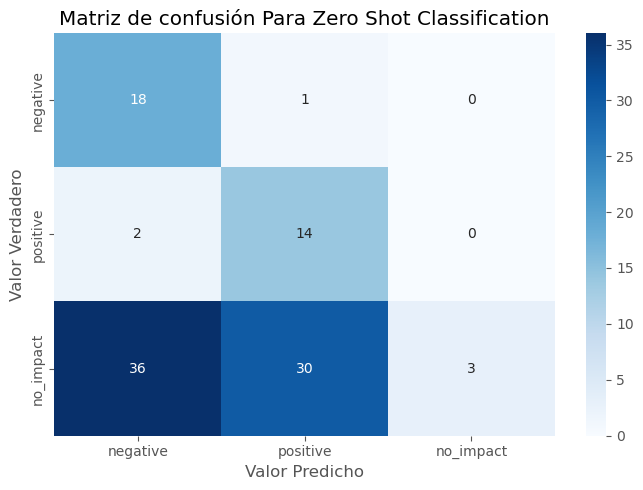

In [ ]:
accuracy = accuracy_score(list(poem_sample["label"]), small_zero_shot_inferences)

classification_labels = unpack_tuple(pd.DataFrame(small_zero_shot_inferences).value_counts().keys().to_list())
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
conf_mat = confusion_matrix(poem_sample["label"], small_zero_shot_inferences, labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Zero Shot Classification",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
benchmark.loc[('Model1', "Size1"), ("Zero Shot Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size1"), ("Zero Shot Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size1"), ("Zero Shot Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size1"), ("Zero Shot Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size1"), ("Zero Shot Classification", "Metric")] =  f"Accuracy: {accuracy}"

#### Medium Size

In [ ]:
zero_shot_base = pipeline(
    task="zero-shot-classification",
    model='cross-encoder/nli-deberta-base',
    model_kwargs={"cache_dir": cache_dir})

model = zero_shot_base.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 139,194,627 parámetros.
El modelo tiene aproximadamente 0.52 GB en memoria.


In [ ]:
start_time = time.time()

zero_shot_base_inferences = [categorize_poem(zero_shot_base, poem) for poem in poem_sample["verse_text"]]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
zero_shot_base_inferences

Tiempo tomado para inferenciar: 48.8022 Segundos...


['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'no_impact',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative'

In [ ]:
print(zero_shot_base_inferences[-1],"\n", poem_sample["verse_text"].iloc[-1])

negative 
 daring to ask for naught, and having naught received.


accuracy: 0.3269230769230769


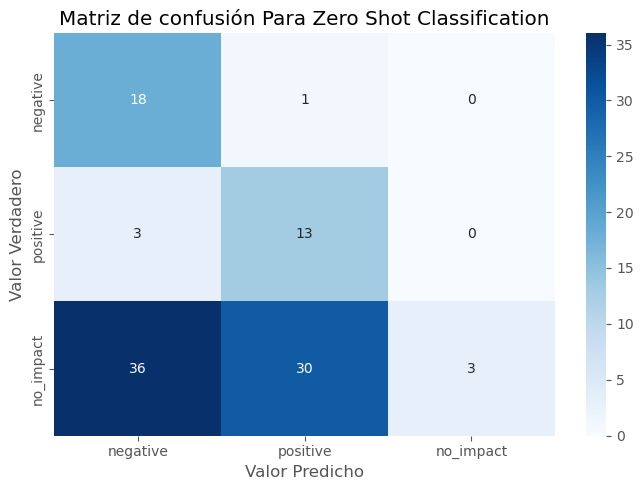

In [ ]:
accuracy = accuracy_score(list(poem_sample["label"]), zero_shot_base_inferences)

classification_labels = unpack_tuple(pd.DataFrame(zero_shot_base_inferences).value_counts().keys().to_list())
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
conf_mat = confusion_matrix(poem_sample["label"], zero_shot_base_inferences, labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Zero Shot Classification",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
benchmark.loc[('Model1', "Size2"), ("Zero Shot Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size2"), ("Zero Shot Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size2"), ("Zero Shot Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model1', "Size2"), ("Zero Shot Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model1', "Size2"), ("Zero Shot Classification", "Metric")] =  f"Accuracy: {accuracy}"

### Set 5, modelo 2

#### Medium Size

In [ ]:
zero_shot_base_1 = pipeline(
    task="zero-shot-classification",
    model='mjwong/multilingual-e5-base-xnli',
    model_kwargs={"cache_dir": cache_dir})


model = zero_shot_base_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 278,045,955 parámetros.
El modelo tiene aproximadamente 1.04 GB en memoria.


In [ ]:
start_time = time.time()

zero_shot_base_1_inferences = [categorize_poem(zero_shot_base_1, poem) for poem in poem_sample["verse_text"]]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
zero_shot_base_1_inferences

Tiempo tomado para inferenciar: 54.9696 Segundos...


['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',

In [ ]:
print(zero_shot_base_1_inferences[-1],"\n", poem_sample["verse_text"].iloc[-1])

negative 
 daring to ask for naught, and having naught received.


accuracy: 0.33653846153846156


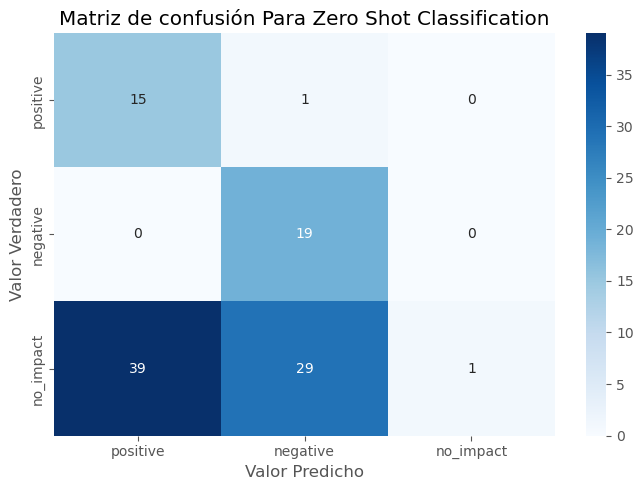

In [ ]:
accuracy = accuracy_score(list(poem_sample["label"]), zero_shot_base_1_inferences)

classification_labels = unpack_tuple(pd.DataFrame(zero_shot_base_1_inferences).value_counts().keys().to_list())
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
conf_mat = confusion_matrix(poem_sample["label"], zero_shot_base_1_inferences, labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Zero Shot Classification",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
benchmark.loc[('Model2', "Size1"), ("Zero Shot Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size1"), ("Zero Shot Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size1"), ("Zero Shot Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size1"), ("Zero Shot Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size1"), ("Zero Shot Classification", "Metric")] =  f"Accuracy: {accuracy}"

#### Large Size

In [ ]:
zero_shot_large_1 = pipeline(
    task="zero-shot-classification",
    model='mjwong/multilingual-e5-large-xnli',
    model_kwargs={"cache_dir": cache_dir})


model = zero_shot_large_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 559,893,507 parámetros.
El modelo tiene aproximadamente 2.09 GB en memoria.


In [ ]:
start_time = time.time()

zero_shot_large_1_inferences = [categorize_poem(zero_shot_large_1, poem) for poem in poem_sample["verse_text"]]

end_time = time.time()

time_taken = round(end_time - start_time, 4)

print(f"Tiempo tomado para inferenciar: {time_taken} Segundos...")
zero_shot_large_1_inferences

Tiempo tomado para inferenciar: 77.4458 Segundos...


['negative',
 'positive',
 'negative',
 'no_impact',
 'positive',
 'negative',
 'positive',
 'positive',
 'no_impact',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'no_impact',
 'negative',
 'no_impact',
 'positive',
 'no_impact',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'no_impact',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'no_impact',
 'negative',
 'neg

In [ ]:
print(zero_shot_large_1_inferences[-1],"\n", poem_sample["verse_text"].iloc[-1])

negative 
 daring to ask for naught, and having naught received.


accuracy: 0.3557692307692308


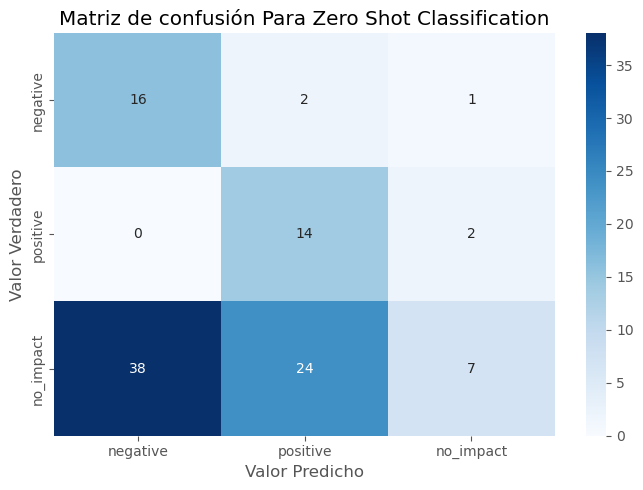

In [ ]:
accuracy = accuracy_score(list(poem_sample["label"]), zero_shot_large_1_inferences)

#classification_labels = poem_sample["label"].unique()
classification_labels = unpack_tuple(pd.DataFrame(zero_shot_large_1_inferences).value_counts().keys().to_list())
print(f"accuracy: {accuracy}")

fig, ax =  plt.subplots(figsize=(7, 5))
#zero_shot_large_1_inferences
conf_mat = confusion_matrix(poem_sample["label"], zero_shot_large_1_inferences, labels=classification_labels)

ax = sns.heatmap(conf_mat, annot=True, xticklabels=classification_labels, yticklabels=classification_labels, cmap="Blues")

ax.set(
    title="Matriz de confusión Para Zero Shot Classification",
    xlabel="Valor Predicho",
    ylabel="Valor Verdadero"
)
plt.tight_layout()
plt.show()

In [ ]:
print(len([inference for inference in zero_shot_large_1_inferences if inference=="negative"]))
print(len([inference for inference in zero_shot_large_1_inferences if inference=="positive"]))
print(len([inference for inference in zero_shot_large_1_inferences if inference=="no_impact"]))

54
40
10


In [ ]:
benchmark.loc[('Model2', "Size2"), ("Zero Shot Classification", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size2"), ("Zero Shot Classification", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size2"), ("Zero Shot Classification", "Qty of Parameters")] =  total_params
benchmark.loc[('Model2', "Size2"), ("Zero Shot Classification", "Inference Time")] =  time_taken
benchmark.loc[('Model2', "Size2"), ("Zero Shot Classification", "Metric")] =  f"Accuracy: {accuracy}"

In [ ]:
benchmark["Zero Shot Classification"]

Info                                        Name Inference Time Size (GB)  \
Model  Size                                                                 
Model1 Size1  cross-encoder/nli-deberta-v3-small        33.7986  0.528608   
       Size2      cross-encoder/nli-deberta-base        48.8022   0.51854   
Model2 Size1    mjwong/multilingual-e5-base-xnli        54.9696  1.035802   
       Size2   mjwong/multilingual-e5-large-xnli        77.4458  2.085766   

Info         Qty of Parameters                         Metric  
Model  Size                                                    
Model1 Size1         141897219  Accuracy: 0.33653846153846156  
       Size2         139194627   Accuracy: 0.3269230769230769  
Model2 Size1         278045955  Accuracy: 0.33653846153846156  
       Size2         559893507   Accuracy: 0.3557692307692308

## Few-shot learning [prompt engineering] [text gen]

### Set 6, modelo 1

#### Medium Size

In [ ]:
# We will limit the response length for our few-shot learning tasks.
few_shot_medium = pipeline(
    task="text-generation",
    model="EleutherAI/gpt-neo-125m",
    max_new_tokens=40,
    eos_token_id= few_shot_medium.tokenizer.eos_token_id,
    model_kwargs={"cache_dir": cache_dir},
)

model = few_shot_medium.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 125,198,592 parámetros.
El modelo tiene aproximadamente 0.47 GB en memoria.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Arreglo de poemas a clasificar
poemas = [
    "The sun rises over the horizon",
    "The storm clouds darken the sky",
    "A new dawn brings hope",
    "Rage filled the hearts of the warriors",
    "The stars shine brightly in the night"
]

# Prompt base con ejemplos etiquetados
prompt_base = """For each poem, describe its sentiment as Positive, Negative, or Neutral.

[Poem]: "The sun rises over the horizon"
[Sentiment]: Positive
###
[Poem]: "The storm clouds darken the sky"
[Sentiment]: Negative
###
[Poem]: "A new dawn brings hope"
[Sentiment]: Positive
###
[Poem]: "Rage filled the hearts of the warriors"
[Sentiment]: Negative
###
[Poem]: "The stars shine brightly in the night"
[Sentiment]: Positive
###
"""

# Función para obtener el sentimiento de cada poema
def obtener_sentimiento(poema):
    prompt = prompt_base + f'[Poem]: "{poema}"\n[Sentiment]:'

    # Genera la predicción
    result = few_shot_medium(
        prompt,
        max_new_tokens=10,  # Ajusta la longitud de texto generado
        num_return_sequences=1,
        do_sample=True,
        temperature=0.7
    )

    # Postprocesamiento para extraer solo el sentimiento (Positive, Negative o Neutral)
    generated_text = result[0]["generated_text"]
    for sentimiento in ["Positive", "Negative", "Neutral"]:
        if sentimiento in generated_text:
            return sentimiento
    return "Unknown"  # Por si no se detecta ningún sentimiento válido

# Recorre el arreglo de poemas y obtiene el sentimiento para cada uno
for poema in poemas:
    sentimiento = obtener_sentimiento(poema)
    print(f'Poema: "{poema}"\nSentimiento: {sentimiento}\n')


Poema: "The sun rises over the horizon"
Sentimiento: Positive

Poema: "The storm clouds darken the sky"
Sentimiento: Positive

Poema: "A new dawn brings hope"
Sentimiento: Positive

Poema: "Rage filled the hearts of the warriors"
Sentimiento: Positive

Poema: "The stars shine brightly in the night"
Sentimiento: Positive



In [ ]:
sentiment_inference_df

In [ ]:
benchmark.loc[('Model1', "Size1"), ("Few Shot Learning", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size1"), ("Few Shot Learning", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size1"), ("Few Shot Learning", "Qty of Parameters")] =  total_params

#### Large Size

In [ ]:
# We will limit the response length for our few-shot learning tasks.
few_shot_large = pipeline(
    task="text-generation",
    model="EleutherAI/gpt-neo-1.3B",
    max_new_tokens=10,
    model_kwargs={"cache_dir": cache_dir},
)

model = few_shot_large.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 1,315,575,808 parámetros.
El modelo tiene aproximadamente 4.90 GB en memoria.


In [ ]:
benchmark.loc[('Model1', "Size2"), ("Few Shot Learning", "Name")] =  model.name_or_path
benchmark.loc[('Model1', "Size2"), ("Few Shot Learning", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model1', "Size2"), ("Few Shot Learning", "Qty of Parameters")] =  total_params

In [ ]:
eos_token_id = few_shot_large.tokenizer.encode("###")[0]

In [ ]:
    # Without any examples, the model output is inconsistent and usually incorrect.
    # With 1 example for each sentiment, the model is more likely to understand!
    results = few_shot_large(
        """For each tweet, describe its sentiment:

    [Tweet]: "I hate it when my phone battery dies."
    [Sentiment]: Negative
    ###
    [Tweet]: "My day has been 👍"
    [Sentiment]: Positive
    ###
    [Tweet]: "This is the link to the article"
    [Sentiment]: Neutral
    ###
    [Tweet]: "This new music video was incredible"
    [Sentiment]:""",
        eos_token_id=eos_token_id,
    )

    print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


For each tweet, describe its sentiment:

[Tweet]: "I hate it when my phone battery dies."
[Sentiment]: Negative
###
[Tweet]: "My day has been 👍"
[Sentiment]: Positive
###
[Tweet]: "This is the link to the article"
[Sentiment]: Neutral
###
[Tweet]: "This new music video was incredible"
[Sentiment]: Negative
###


### Set 6, modelo 2

#### Medium Size

In [ ]:
# We will limit the response length for our few-shot learning tasks.
few_shot_medium_1 = pipeline(
    task="text-generation",
    model="microsoft/biogpt",
    max_new_tokens=10,
    model_kwargs={"cache_dir": cache_dir},
)

model = few_shot_medium_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")

# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 346,763,264 parámetros.
El modelo tiene aproximadamente 1.29 GB en memoria.


In [ ]:
benchmark.loc[('Model2', "Size1"), ("Few Shot Learning", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size1"), ("Few Shot Learning", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size1"), ("Few Shot Learning", "Qty of Parameters")] =  total_params

#### Large Size

In [ ]:
# We will limit the response length for our few-shot learning tasks.
few_shot_large_1 = pipeline(
    task="text-generation",
    model="microsoft/BioGPT-Large",
    max_new_tokens=10,
    model_kwargs={"cache_dir": cache_dir},
)

model = few_shot_large_1.model
total_params = sum(p.numel() for p in model.parameters())
print(f"El modelo tiene aproximadamente {total_params:,} parámetros.")


# Calcular el tamaño en memoria del modelo en base al dtype de los parámetros
model_memory_size = sum(p.numel() * p.element_size() for p in model.parameters())
model_memory_size_gb = model_memory_size / (1024 ** 3)  # Convertir a GB

# Mostrar el tamaño en memoria
print(f"El modelo tiene aproximadamente {model_memory_size_gb:.2f} GB en memoria.")

El modelo tiene aproximadamente 1,571,188,800 parámetros.
El modelo tiene aproximadamente 5.85 GB en memoria.


In [ ]:
benchmark.loc[('Model2', "Size2"), ("Few Shot Learning", "Name")] =  model.name_or_path
benchmark.loc[('Model2', "Size2"), ("Few Shot Learning", "Size (GB)")] =  model_memory_size_gb
benchmark.loc[('Model2', "Size2"), ("Few Shot Learning", "Qty of Parameters")] =  total_params

In [ ]:
benchmark

Task                    Summarization                           \
Info                             Name Inference Time Size (GB)   
Model  Size                                                      
Model1 Size1                 t5-small         45.933  0.225405   
       Size2                 t5-large       641.1396  2.748028   
Model2 Size1     ainize/bart-base-cnn        59.1367  0.519382   
       Size2  facebook/bart-large-cnn       129.8954   1.51355   

Task                                                   \
Info         Qty of Parameters                 Metric   
Model  Size                                             
Model1 Size1          60506624   Rouge_average 0.1209   
       Size2         737668096    Rouge_average 0.119   
Model2 Size1         139420416  Rouge_average: 0.1469   
       Size2         406290432  Rouge_average: 0.1403   

Task                                   Text Classification                 \
Info                                                  Name Inference Time   
Model  Size                                                                 
Model1 Size1  nickwong64/bert-base-uncased-poems-sentiment          8.256   
       Size2       siebert/sentiment-roberta-large-english         9.6166   
Model2 Size1            WeightWatcher/albert-large-v2-mnli        15.8204   
       Size2              AiManatee/RoBERTa_poem_sentiment         7.1454   

Task                                                                    ...  \
Info         Size (GB) Qty of Parameters                        Metric  ...   
Model  Size                                                             ...   
Model1 Size1  0.407865         109485316  Accuracy: 0.8461538461538461  ...   
       Size2  1.323826         355361794  Accuracy: 0.8857142857142857  ...   
Model2 Size1  0.065889          17687043                Accuracy: 0.38  ...   
       Size2  0.464353         124648708  Accuracy: 0.6634615384615384  ...   

Task                    Zero Shot Classification                           \
Info                                        Name Inference Time Size (GB)   
Model  Size                                                                 
Model1 Size1  cross-encoder/nli-deberta-v3-small        23.8266  0.528608   
       Size2      cross-encoder/nli-deberta-base        26.2828   0.51854   
Model2 Size1    mjwong/multilingual-e5-base-xnli        20.9839  1.035802   
       Size2   mjwong/multilingual-e5-large-xnli        52.1881  2.085766   

Task                                                           \
Info         Qty of Parameters                         Metric   
Model  Size                                                     
Model1 Size1         141897219  Accuracy: 0.33653846153846156   
       Size2         139194627   Accuracy: 0.3269230769230769   
Model2 Size1         278045955  Accuracy: 0.33653846153846156   
       Size2         559893507   Accuracy: 0.3557692307692308   

Task         Few Shot Learning                                             \
Info                      Name Inference Time Size (GB) Qty of Parameters   
Model  Size                                                                 
Model1 Size1               NaN            NaN       NaN               NaN   
       Size2               NaN            NaN       NaN               NaN   
Model2 Size1               NaN            NaN       NaN               NaN   
       Size2               NaN            NaN       NaN               NaN   

Task                 
Info         Metric  
Model  Size          
Model1 Size1    NaN  
       Size2    NaN  
Model2 Size1    NaN  
       Size2    NaN  

[4 rows x 30 columns]

In [ ]:
benchmark.to_excel("benchmark.xlsx")

In [ ]:
(benchmark.T).to_excel("benchmark_v2.xlsx")